# Практика

в этом ноутбуке мы попробуем смоделировать сверх-упрощенную модель солнечной системы, используя классы. Для простоты в классе мы будем использовать следующие допущения:
- в нашей системе солнце неподвижно
- все планеты и спутники имеют круговую орбиту
- данные полученны из публичной таблицы, в качестве радиуса используем большую полуокружность.

[данные](http://www.allplanets.ru/solar_sistem.htm)

In [1]:
%matplotlib inline
import pylab as plt

from matplotlib.patches import Ellipse

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

# Interaction

In [3]:
def f(x):
    return x

In [4]:
interact(f, x=IntSlider(10, max=3650, min=0, step=1));

interactive(children=(IntSlider(value=10, description='x', max=3650), Output()), _dom_classes=('widget-interac…

# Model

In [5]:
from math import sin, cos, radians, pi

In [56]:
class Celestial(object):
    x = 0
    y = 0
    params = dict()
    
    def __init__(self, name, 
                 radius=10_000, period=365, 
                 start=0, color='grey', size=20, **kwargs):
        
        self.name = name
        self.radius = radius
        self.period = period
        self.start = start
        self.color = color
        self.size = size
        
        self.calc_position(0)  # start position
        self.params.update(kwargs)

        
    def calc_position(self, days):
        # need to clarify start units
        angle = self.start + radians(360* (days / self.period))
        
        self.x = self.radius * cos(angle)
        self.y = self.radius * sin(angle)
    
    def draw_orbit(self, ax):
        orbit = Ellipse((0, 0), self.radius*2, self.radius*2, facecolor='none', edgecolor='grey', linestyle='--')
        ax.add_artist(orbit)
    
    def vis(self, ax=None):
        'visualize planet on the plot'
        if ax is None:
            fig, ax = plt.subplots()

        self.draw_orbit(ax=ax)
        ax.scatter(self.x, self.y, s=self.size, c=self.color)
        
        
        
        
        

In [57]:
Earth = Celestial('Earth', color='blue', size=50, radius=5000)

(-15000, 15000)

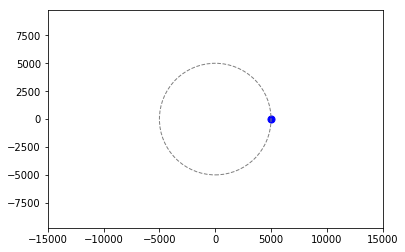

In [58]:
fig, ax = plt.subplots()

Earth.vis(ax=ax)

ax.axis('equal');
ax.set_xlim(-15_000, 15_000)
ax.set_ylim(-15_000, 15_000)

In [59]:
Earth.calc_position(180)

(-15000, 15000)

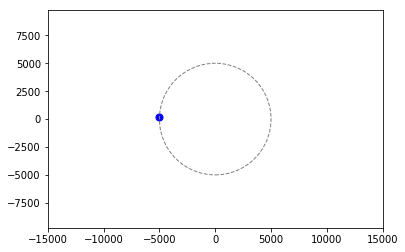

In [60]:
fig, ax = plt.subplots()

Earth.vis(ax=ax)

ax.axis('equal');
ax.set_xlim(-15_000, 15_000)
ax.set_ylim(-15_000, 15_000)

# Interaction

In [61]:
bodies = [Earth, ]

In [62]:
def update_all(days):
    fig, ax = plt.subplots(figsize=(12,12))
    
    for body in bodies:
        body.calc_position(days)
        body.vis(ax)
    
    ax.axis('equal');
    ax.set_xlim(-15_000, 15_000)
    ax.set_ylim(-15_000, 15_000)
    plt.axis('off')

In [64]:

interact(update_all, days=IntSlider(10, max=365, min=0, step=1));



interactive(children=(IntSlider(value=10, description='days', max=365), Output()), _dom_classes=('widget-inter…

# Sun and planets

### Sun

### Hacky way

In [65]:
sun = Celestial('Солнце', 0, 1, 0, 'yellow', 200) # period=0 raises exception
sun.calc_position = lambda x: None

## Better (but longer) way

In [66]:
class Star(Celestial):
    radius = 0
    period = 0
    
    def calc_position(self, days):
        pass
    

In [67]:
sun = Star(name='Солнце')

## Planets

In [68]:
import pandas as pd
url = 'http://www.allplanets.ru/solar_sistem.htm'

In [69]:
df = pd.read_html(url, index_col=0, header=0)[0].T

In [70]:
df.iloc[:, [1, 5, -1]]

Планета,Расстояние от Солнца в перигелии,"Сидерический период, лет",Число известных спутников
Меркурий,"46,0 или 0,308 а.е.","0, 241 или 87,97 дней",0
Венера,"107,48 или 0,718 а.е.","0,615 или 224,7 дней",0
Земля,"147,1 или 0,983 а.е.","365,24 дней",1
Марс,"206,6 или 1,38 а.е.","1,88 или 686,9 дней",2
Юпитер,"740,74 или 4,95 а.е.",11857,62
Сатурн,"13495 или 9,02 а.е.",294,34
Уран,"27356 или 18,29 а.е.",8402,27
Нептун,"44596 или 29,81 а.е.",16479,13
Плутон,"44368 или 29,66 а.е.",24792,5


In [71]:
planets_data = [
    {"name":'Меркурий', 'radius':46, 'color':'orange', 'period':88, 'satellites': 0},
    {"name":'Венера', 'radius':108, 'color':'yellow', 'period':225, 'satellites': 0},
    {"name":'Земля', 'radius':147, 'color':'blue', 'period':365, 'satellites': 1},
    {"name":'Марс', 'radius':206, 'color':'red', 'period':687, 'satellites': 2},
#     {"name":'Юпитер', 'radius':740, 'color':'orange', 'period':11857, 'satellites': 62},
#     {"name":'Сатурн', 'radius':13495, 'color':'grey', 'period':294, 'satellites': 34},
#     {"name":'Уран', 'radius':27356, 'color':'purple', 'period':8402, 'satellites': 27},
#     {"name":'Нептун', 'radius':44596, 'color':'darkblue', 'period':16479, 'satellites': 13},
#     {"name":'Плутон', 'radius':44368, 'color':'black', 'period':24792, 'satellites': 5},
    
]

In [72]:
bodies = {planet['name']: Celestial(size=100, **planet) for planet in planets_data}

In [73]:
bodies['sun'] = sun

# Satellite

In [92]:
class Satellite(Celestial):
    '''rotates around the planet'''
    planet = None
    
    def __init__(self, planet, *args, **kwargs):
        self.planet = planet
        super().__init__(*args, **kwargs)
    
    def calc_position(self, days):
        super().calc_position(days)
        self.x += self.planet.x
        self.y += self.planet.y
    
    def draw_orbit(self, ax):
        orbit = Ellipse((self.planet.x, self.planet.y), self.radius*2, self.radius*2, facecolor='none', edgecolor='grey', linestyle='--')
        ax.add_artist(orbit)
        

Из гугла: Орби́та Луны́ — траектория, по которой Луна вращается вокруг общего с Землёй центра масс, располагающегося примерно в 4700 км от центра Земли. Каждый оборот занимает 27,3 земных суток и называется сидерическим месяцем. В среднем Луна удалена от центра Земли на 60 земных радиусов, что составляет 385000 км.

In [93]:
moon = Satellite(name='Луна', planet=bodies['Земля'], radius=10, period=27)

In [94]:
bodies['Лунв'] = moon

In [95]:
moon.planet.x

147.0

# Visualise

In [96]:
def update_all(days):
    fig, ax = plt.subplots(figsize=(12,12))
    
    for body in bodies.values():
        body.calc_position(days)
        body.vis(ax)
    
    ax.axis('equal');
#     ax.set_xlim(-15_000, 15_000)
#     ax.set_ylim(-15_000, 15_000)
    plt.axis('off')

In [97]:

interact(update_all, days=IntSlider(0, max=365, min=0, step=1));



interactive(children=(IntSlider(value=0, description='days', max=365), Output()), _dom_classes=('widget-intera…